# W.2. Flat and Forward Volatility

## FINM 37500: Fixed Income Derivatives

### Mark Hendricks

#### Winter 2024

LaTeX notation
$$\newcommand{\floorlet}{c}$$
$$\newcommand{\dt}{dt}$$
$$\newcommand{\flatvol}{\overline{\sigma}}$$
$$\newcommand{\flatvolT}{\overline{\sigma_{T}}}$$
$$\newcommand{\fwdvol}{\overrightarrow{\sigma}}$$
$$\newcommand{\fwdvolTi}{\overrightarrow{\sigma_{T_i}}}$$


$$\newcommand{\Efwd}{\tilde{E}}$$
$\newcommand{\strike}{K}$

$\newcommand{\nargcond}{d_{1}}$
$\newcommand{\nargexer}{d_{2}}$

$\newcommand{\EcondS}{\hat{S}_{\text{conditional}}}$
$\newcommand{\probexer}{\hat{\mathcal{P}}_{\text{exercise}}}$

$\newcommand{\Black}{\mathcal{B}}$
$\newcommand{\Blackcall}{\Black_{\text{call}}}$
$\newcommand{\Blackput}{\Black_{\text{put}}}$

### Arbitrary parameterization

* We chose an arbitrary value in our binomial tree (Black-Derman-Toy) for $\sigma$.

* While we could parameterize $\sigma$ for the natural-measure vol, this will not lead to satisfactory pricing.

* Rather, we fit $\sigma$ to the implied volatility of a benchmark derivative.

### Caps and Floors

The largest OTC rate derivatives are caps, floors, and swaptions.

Caps and floors thus are a liquid benchmark for this parameterization.

But how do we pick which cap or floor to use? 

## Flat Volatility

The **flat** volatility is the **implied** volatility that matches the market price of a given **cap** or **floor**.

### A single implied vol for the bundle!

Note that a cap (floor) is a portfolio of various options.

Yet the **flat** volatility is quoting a single implied volatility to price each caplet (floorlet), even though it contains options at different maturities.

$$p_{\text{cap}}(T) = \sum_{i=1}^n p_{\text{caplet}}(T_i,\flatvolT)$$

In this sense, the **flat** volatility is a quoting convention.
* It quotes the price of the bundle of caplets (floorlets) for a given maturity.
* It is inconsistent: it prices the caplets (floorlets) based on which bundle they are in instead of which maturity they have.
* The $T=.5$ and $T=1$ cap both have a caplet at $T=.5$, yet the **flat** volatility assigns them different vols, due to being in different bundles (caps).

### Sound Familiar?

This is **exactly** the issue with **yield-to-maturity**!
* YTM is a useful way to quote bond prices to account for differing maturities / coupouns.
* Flat vol is a useful way to quote cap/floor prices to account for differing expirations / strikes.

## Forward Volatility

For pricing, we need an implied volatility that is applicable to every **caplet** (floorlet) of a given maturity, $T_i$.

Then, pricing a **cap**, which is a bundle of **caplets** would be done with...

$$p_{\text{cap}}(T) = \sum_{i=1}^n p_{\text{caplet}}(T_i,\fwdvolTi)$$

### Pricing

Neither YTM nor flat volatility is appropriate to use for discounted cashflow pricing!

Forward volatilities are appropriate--exactly as the **discount (spot) rate** is for bonds.

I'll bet you can guess what we need to do...

### Extracting Forward Volatilites from Flat Volatilities

We can **bootstrap** the forward volatilities.

1. Get a set of caps with expirations on a grid of dates, $T_i$, starting with $i=1$. Make sure there is a cap expiring on each $T_i$.
2. Uncover $\fwdvol$ for $i=1$ by noting it equals the flat vol.
3. For $i=2$, use the $\fwdvol$ for $i=1$ and $\flatvol$ for $i=1$ to uncover $\fwdvol$ for $i=2$.

This is also referred to as *stripping* the forward volatilities.

## Volatility of the Forward Measure

Consider using Black's model and forward-measure pricing to...
* extract the forward measure (similar to the risk neutral measure) from caps
* apply the measure to swaptions

We can extract what we need from caps with the...
* quoted cap prices 
* forward rates
* discount factors

With the **forward volatilities**...
* convert them to forward-measure volatility
* price interest-rate derivatives using this forward measure in...
    - Black's model
    - extensions or relatives of Black's model
    - monte carlo simulation

# Parameterizing BDT

### Two quotes and two parameters

The **forward volatilites** can be used as $\sigma_t$ in BDT.
* That is, we are now allowing time-varying vol in the BDT dynamics.
* By using these forward vols, the BDT model will fit the term structure of rates **and** of cap/floors.

#### Solution?
You'll recall that we can recursively solve for the drifts, $\theta_i$ for each period $i$ by fitting the term structure of rates, (using zero-coupon bonds or a similar discount-curve set of securities.)

With a term structure of caps/floors, we can strip out the caplets/floorlets.
* Recursively solve for $\sigma_i$ in each period simultaneously with $\theta_i$ to fit both the discount rates and the caplet/floorlet rates.

Is there a solution?
* Yes. Each period two unknowns: $\theta_i, \sigma_i$ and two market quotes, (zero coupon bond and cap/floor.)
* But this procedure relies on having a complete set of market quotes from $0\le t\le T$. 
* Often some maturities are missing, and the user interpolates a discount rate and a cap/floor rate.

### Black's Formula

In practice, there is a more common approach to parameterizing the tree than the two-variable optimization above of simultaneously solving $\theta_i$ and $\sigma_i$ at each step.

Recall the continuous-time **Black's Formula**.

Any derivative of a forward is a martingale:
$$f(F,t) = Z(t,T)\Efwd\left[f(F,T)\right]$$
where 
* $F$ denotes the forward of an arbitrary asset.
* and $\Efwd$ denotes the expectation under the **forward measure**

$$\begin{align}
\Blackcall(t)\; =&\; Z(t,T)\left[F_t\mathcal{N}(\nargcond) - \strike \mathcal{N}\left(\nargexer\right)\right]\\
\Blackput(t)\; =&\; Z(t,T)\left[\strike\mathcal{N}(-\nargexer) - F_t \mathcal{N}\left(-\nargcond\right)\right]
\end{align}$$

where $\nargcond$ and $\nargexer$ are

$\begin{align}
\nargcond = \frac{\ln\left(\frac{F_t}{\strike}\right) + \frac{\sigma^2}{2}T}{\sigma\sqrt{T}} \hspace{1cm} 
\nargexer = \nargcond -\sigma\sqrt{T}
\end{align}$

## Implied vol (Black)

1. Use the caps / floors to strip out caplets / floorlets in a term structure for maturities $0\le t \le T$.
2. Solve Black's formula for $\sigma_t$ for each maturity such that Black's formula matches the market price.
3. Use this set of implied forward volatilities in the BDT model.

This is considerably faster than solving $\theta, \sigma$ jointly at each step. 

### Theoretically Consistent?

Are we haphazardly sticking two models together: BDT (discrete time) and Black (continuous time)?
* No. It can be shown that BDT works as a discretization of Black.
* For small time steps in BDT, the implied vols from the direct estimation will converge to the implied vols from Black's formula.

## Market Quoting Convention

In fact, this implied Black's volatility is not just handy for working with the BDT model.

**It is the market convention for quoting cap and floor prices.**

A cap will be quoted with a flat vol.
* To determine the actual market price, plug this flat vol into Black's formula for each corresponding caplet.

Questions:
* What if you do not want to model with Black's formula? Is this a problem?
* Why are caps, floors, and swaptions quoted in terms of implied vol?

### "Normal" quotes

In recent years, it is common to see a "normal" quote for implied volatilities.
* In recent years, the issue of negative rates / prices has become relevant.
* Thus, "normal" models such as Bachelier are standard.
* (Black's formula relies on lognormal dynamics.)
* These normal vol quotes can be converted to Black vols and vice-versa.
* Bloomberg displays quotes in both measures, for instance.

$$\sigma_B = \frac{\sigma_N}{f}$$

where 
* $f$ is the forward rate.
* $\sigma_B$ is the "Black" vol
* $\sigma_N$ is the "normal" vol

The formula holds for **ATM** (at-the-money) options. 
* For OTM (out-of-the-money) options, some further adjustment is needed.
* See Hagan's SABR paper and related papers for details.

#### Note on Bloomberg Quotes

Cap quotes in Bloomberg are downloaded in **normal** vol.
* The terminal allows user to view lognormal (Black) vol, but when using the API, seemingly restricts to normal.

The normal vols are reported in basis points.
* divide by $100$ to get to percent
* divide by $100$ to convert from percent to decimal.

***

# Example of Stripping Caps

We consider **quarterly** caps.
* they have caplets expiring each quarter, with $.5\le \tau \le T$.
* the flat volatility at $T$ is input for every caplet corresponding to the cap of $T$.

#### Careful!
* in Black's formula, use $T-0.25$ as the rate for the caplet is determined one period before it is paid.

### Payoff and Valuation
The payoff of each caplet is
$$\frac{100}{4}\max(r-K,0)$$

Thus, the corresponding value in Black's fomula for a caplet is
$$P_{\text{cap}}(t,T,K) = \frac{100}{4} \sum_{\tau}^T \Blackcall(\overline{\sigma}_T, \tau-1/4, K, f_{\tau}, Z_\tau)$$

where $\tau$ equals $\frac{j}{4}$ over the range of integers $j$, $2\le j \le 4T$.

Note here that for every caplet in cap $T$, we plug in the same 
* flat vol with tenor $T$.
* strike, which in this example is ATM and thus equals the time-$t$ swap rate of maturity $T$.

#### Notation
To simplify the notation inside the arguments of Black's formula, we denote

$
\begin{align}
Z_\tau & \equiv Z(t,t+\tau)\\
f_\tau & \equiv f(t,t+\tau-1/4, t+\tau)
\end{align}
$

## Cap parameters
Consider the ATM (at-the-money) cap:
* the cap's strike is the swap rate with the same tenor. 
* cap has expiration $T=2$.
* the notional of the cap is \$100.

## Getting Caplet Prices and Forward Vols

We can use the flat volatility to get the price of the caps.

Using the cap prices, we strip out the
* caplet prices
* forward volatility at $\tau$ which properly prices caplet $\tau$ using Black's formula.

In [1]:
import numpy as np
import pandas as pdf

import sys
sys.path.insert(0, '../cmds')
from ficcvol import *
from binomial import *
from ratecurves import *

In [2]:
import datetime
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

In [3]:
DATE = '2023-03-31'
curves = pd.read_excel(f'../data/cap_curves_{DATE}.xlsx', sheet_name=f'rate curves {DATE}').set_index('tenor')

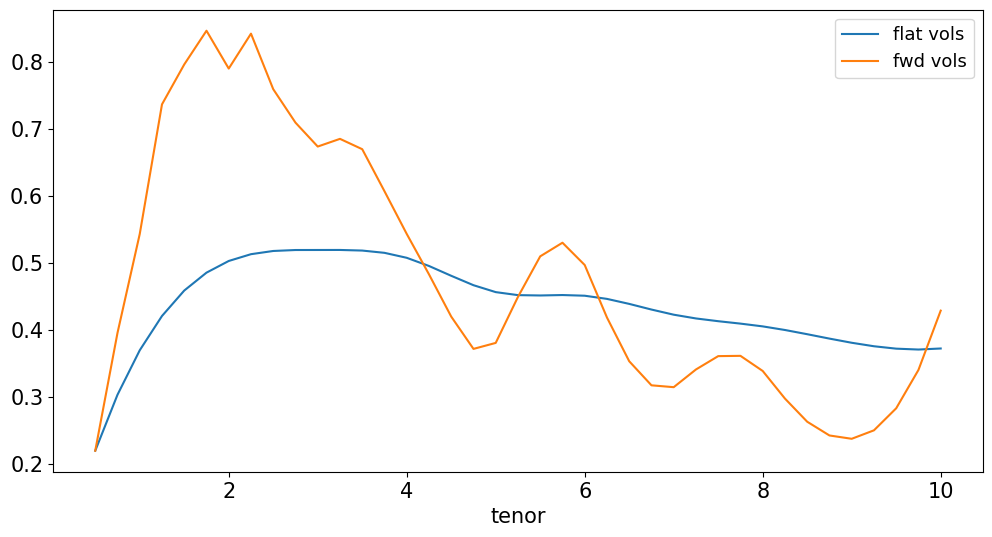

In [4]:
capcurves = flat_to_forward_vol(curves)

capcurves[['flat vols','fwd vols']].plot();

In [5]:
capcurves[['flat vols','cap prices','caplet prices','fwd vols']].style.format({'flat vols':'{:.2%}','caplet prices':'{:.2f}','fwd vols':'{:.2%}','cap prices':'{:.2f}'})

,flat vols,cap prices,caplet prices,fwd vols
tenor,,,,
0.250000,nan%,nan,nan,nan%
0.500000,21.95%,0.05,0.05,21.95%
0.750000,30.31%,0.16,0.11,39.54%
1.000000,36.95%,0.32,0.16,54.31%
1.250000,42.07%,0.52,0.20,73.67%
1.500000,45.87%,0.75,0.22,79.63%
1.750000,48.54%,0.98,0.23,84.66%
2.000000,50.28%,1.22,0.24,79.01%
2.250000,51.30%,1.46,0.24,84.23%


***